<a href="https://colab.research.google.com/github/medhhaa/Statistics/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading and Exploring Data:

In [ ]:
# Dataset
dataset = [10, 12, 14, 11, 13, 9, 8, 7, 13, 14, 8, 14, 7, 12, 6, 16, 14, 13, 15, 11, 12, 9, 10, 9, 12, 14, 108, 14, 13, 15, 10, 14, 13, 11, 14, 14, 10, 101]
len(dataset)

38

(array([36.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  6. ,  16.2,  26.4,  36.6,  46.8,  57. ,  67.2,  77.4,  87.6,
         97.8, 108. ]),
 <BarContainer object of 10 artists>)

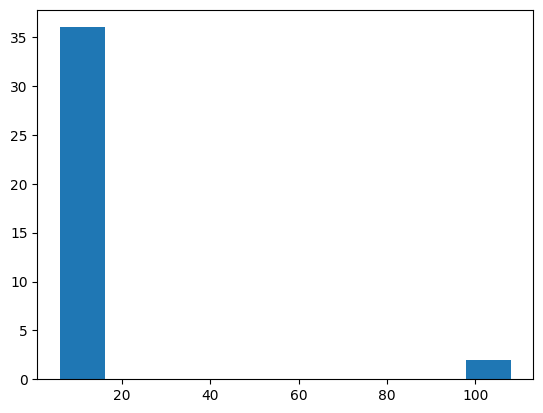

In [ ]:
# Histogram also helps you identify outliers while visaulizing the data points:
plt.hist(dataset)

## Z Score

In [ ]:
# Z Score
# z score = Xi - Mean / Standard Deviation
outliers = []
# a function to detect outliers:
def detect_outliers(data):
    # If the point lies outside of the third standard deviation, it is an outlier.
    threshold = 3 # according to 3rd standard deviation
    mean = np.mean(data)
    std = np.std(data)
    print(f'Mean: {mean:.2f} Std Dev: {std:.2f}')
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

detect_outliers(dataset)

Mean: 16.58 Std Dev: 20.89


[108, 101]

## IQR (Inter Quartile Range):
Five Number Summary
1. Sort the data
2. Calculate Q1 (25%) and Q3 (75%)
3. IQR (Q3 - Q1)
4. Find the lower bound Q1 - 1.5(IQR)
5. Find the upper bound Q3 + 1.5(IQR)




In [ ]:
# 1. Sort the data
dataset = sorted(dataset)
print(dataset)

[6, 7, 7, 8, 8, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 16, 101, 108]


In [ ]:
# 2. Calulcate percentiles Q1 and Q2
q1, q3 = np.percentile(dataset, [25, 75])
print(q1, q3)

10.0 14.0


In [ ]:
# 3. Calculate IQR
iqr = q3 - q1
print(iqr)

4.0


In [ ]:
# 4. Lower Bound
lb = q1 - (1.5 * iqr)

#5. Upper Bound
ub = q3 + (1.5 * iqr)

# This is the range between which our data distribution lies.
# Outliers are the numbers outside of this range
print(lb, ub)

4.0 20.0


In [ ]:
# Find out outliers
outliers = []
for x in dataset:
    if x < lb or x > ub:
        outliers.append(x)
print(outliers)

[101, 108]


## Boxplot

<Axes: >

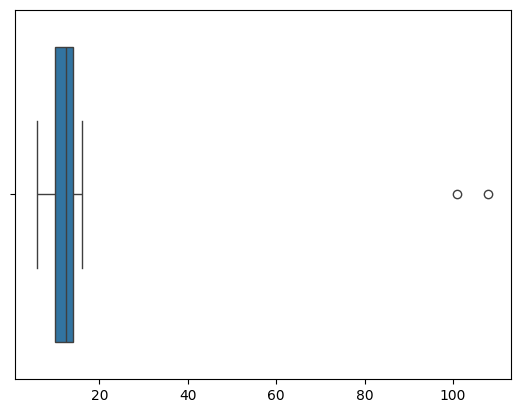

In [ ]:
sns.boxplot(x = dataset)

There are two outlier points that can be identified via the boxplot.